Question 1

In [1]:
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

In [5]:
users = pd.read_csv(url, sep="|") 

In [7]:
mean_age_per_occupation = users.groupby("occupation")["age"].mean()
print("Mean Age Per Occupation:")
print(mean_age_per_occupation)

Mean Age Per Occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [9]:
users["is_male"] = users["gender"].apply(lambda x: 1 if x == "M" else 0)

male_ratio = users.groupby("occupation")["is_male"].mean().sort_values(ascending=False)

print("Male Ratio Per Occupation (Sorted):")
print(male_ratio)

Male Ratio Per Occupation (Sorted):
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: is_male, dtype: float64


In [11]:
min_max_age = users.groupby("occupation")["age"].agg(["min", "max"])

print("Minimum and Maximum Age Per Occupation:")
print(min_max_age)

Minimum and Maximum Age Per Occupation:
               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [13]:
mean_age_by_occupation_gender = users.groupby(["occupation", "gender"])["age"].mean()

print("Mean Age by Occupation and Gender:")
print(mean_age_by_occupation_gender)

Mean Age by Occupation and Gender:
occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.02898

In [15]:
gender_counts = users.groupby(["occupation", "gender"])["user_id"].count().unstack()


gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

print("Percentage of Women and Men Per Occupation:")
print(gender_percentage)

Percentage of Women and Men Per Occupation:
gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


Question 2

In [17]:
import pandas as pd

In [19]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

In [21]:
euro12 = pd.read_csv(url)

In [23]:
goals = euro12["Goals"]
print(goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [25]:
num_teams = euro12["Team"].nunique()
print(f"Number of teams: {num_teams}")

Number of teams: 16


In [27]:
num_columns = euro12.shape[1]
print(f"Number of columns: {num_columns}")

Number of columns: 35


In [29]:
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [31]:
sorted_discipline = discipline.sort_values(by=["Red Cards", "Yellow Cards"], ascending=[True, True])
print(sorted_discipline)

                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


In [33]:
mean_yellow_cards = euro12["Yellow Cards"].mean()
print(f"Mean Yellow Cards per Team: {mean_yellow_cards}")

Mean Yellow Cards per Team: 7.4375


In [35]:
teams_more_than_6_goals = euro12[euro12["Goals"] > 6]
print(teams_more_than_6_goals)

       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [37]:
teams_starting_with_G = euro12[euro12["Team"].str.startswith("G")]
print(teams_starting_with_G)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [39]:
first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [41]:
all_but_last_3 = euro12.iloc[:, :-3]
print(all_but_last_3)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [43]:
shooting_accuracy = euro12[euro12["Team"].isin(["England", "Italy", "Russia"])][["Team", "Shooting Accuracy"]]
print(shooting_accuracy)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


Question 3

In [45]:
import pandas as pd
import numpy as np  

In [86]:
series1 = pd.Series(np.random.randint(1, 5, 100)) 
series2 = pd.Series(np.random.randint(1, 4, 100))  
series3 = pd.Series(np.random.randint(10000, 30001, 100))  

In [49]:
df = pd.concat([series1, series2, series3], axis=1)

In [51]:
df.columns = ["bedrs", "bathrs", "price_sqr_meter"]
print(df.head())  

   bedrs  bathrs  price_sqr_meter
0      1       2            15021
1      4       3            11134
2      2       1            26409
3      1       1            19680
4      4       3            27340


In [53]:
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], axis=0), columns=["bigcolumn"])
print(bigcolumn.head(105))  

    bigcolumn
0           1
1           4
2           2
3           1
4           4
..        ...
0           2
1           3
2           1
3           1
4           3

[105 rows x 1 columns]


In [55]:
print(bigcolumn.index) 

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64', length=300)


In [57]:
bigcolumn.reset_index(drop=True, inplace=True) 
print(bigcolumn)

     bigcolumn
0            1
1            4
2            2
3            1
4            4
..         ...
295      28161
296      29745
297      18338
298      24676
299      12562

[300 rows x 1 columns]


Question 4

In [60]:
import pandas as pd
import numpy as np

In [66]:
file_path = r"C:\Users\Vishnu Mohan\Desktop\Problem set 3\wind.txt" 
data = pd.read_csv(file_path, sep=r'\s+')

In [68]:
data.columns = ["Yr", "Mo", "Dy"] + list(data.columns[3:]) 
data["Date"] = pd.to_datetime(data[["Yr", "Mo", "Dy"]].astype(str).agg("-".join, axis=1), format="%y-%m-%d")
data = data.set_index("Date") 
data = data.drop(columns=["Yr", "Mo", "Dy"])  

In [70]:
def fix_year(x):
    if x.year > 2000:
        return x.replace(year=x.year - 100)
    return x

data.index = data.index.map(fix_year)


In [72]:
data.index = pd.to_datetime(data.index)
print(data.index.dtype)  

datetime64[ns]


In [74]:
missing_values = data.isna().sum()
print("Missing values for each location:")
print(missing_values)

Missing values for each location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [76]:
non_missing_values = data.notna().sum().sum()
print(f"Total non-missing values: {non_missing_values}")

Total non-missing values: 78857


In [78]:
overall_mean = data.mean().mean()
print(f"Overall mean windspeed: {overall_mean}")

Overall mean windspeed: 10.227982360836938


In [80]:
loc_stats = data.agg(["min", "max", "mean", "std"])
print(loc_stats)

            RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
std    4.977555   4.499449   4.166872   4.503954   5.835037   6.699794  


In [82]:
day_stats = data.agg(["min", "max", "mean", "std"], axis=1)
print(day_stats)

             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


In [84]:
january_data = data[data.index.month == 1]
january_avg = january_data.mean()
print("Average January windspeed for each location:")
print(january_avg)

Average January windspeed for each location:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [92]:
yearly_data = data.resample("YE").mean() 
print(yearly_data)

                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

In [96]:
monthly_data = data.resample("ME").mean()
print(monthly_data)

                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

In [98]:
weekly_data = data.resample("W").mean()
print(weekly_data)

                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

In [100]:
weekly_stats = data.resample("W").agg(["min", "max", "mean", "std"])
first_52_weeks = weekly_stats.iloc[:52] 
print(first_52_weeks)

              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3

Question 5

In [103]:
import pandas as pd

In [105]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep="\t")

In [107]:
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [109]:
num_observations = chipo.shape[0]  
print(f"Number of observations: {num_observations}")

Number of observations: 4622


In [111]:
num_columns = chipo.shape[1] 
print(f"Number of columns: {num_columns}")

Number of columns: 5


In [113]:
print("Column names:", chipo.columns.tolist())

Column names: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [115]:
print("Dataset Index:", chipo.index)

Dataset Index: RangeIndex(start=0, stop=4622, step=1)


In [117]:
most_ordered_item = chipo.groupby("item_name")["quantity"].sum().idxmax()
print(f"Most-ordered item: {most_ordered_item}")

Most-ordered item: Chicken Bowl


In [119]:
most_ordered_quantity = chipo.groupby("item_name")["quantity"].sum().max()
print(f"Quantity of most-ordered item: {most_ordered_quantity}")

Quantity of most-ordered item: 761


In [121]:
most_ordered_choice = chipo["choice_description"].value_counts().idxmax()
print(f"Most-ordered item in choice_description: {most_ordered_choice}")

Most-ordered item in choice_description: [Diet Coke]


In [123]:
total_items_ordered = chipo["quantity"].sum()
print(f"Total items ordered: {total_items_ordered}")

Total items ordered: 4972


In [125]:
print(chipo["item_price"].dtype)

object


In [127]:
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))

In [129]:
print(chipo["item_price"].dtype)

float64


In [131]:
revenue = (chipo["quantity"] * chipo["item_price"]).sum()
print(f"Total revenue: ${revenue:.2f}")

Total revenue: $39237.02


In [133]:
num_orders = chipo["order_id"].nunique()
print(f"Total orders: {num_orders}")

Total orders: 1834


In [135]:
avg_revenue_per_order = revenue / num_orders
print(f"Average revenue per order: ${avg_revenue_per_order:.2f}")

Average revenue per order: $21.39


In [137]:
num_unique_items = chipo["item_name"].nunique()
print(f"Number of different items sold: {num_unique_items}")

Number of different items sold: 50


Question 6

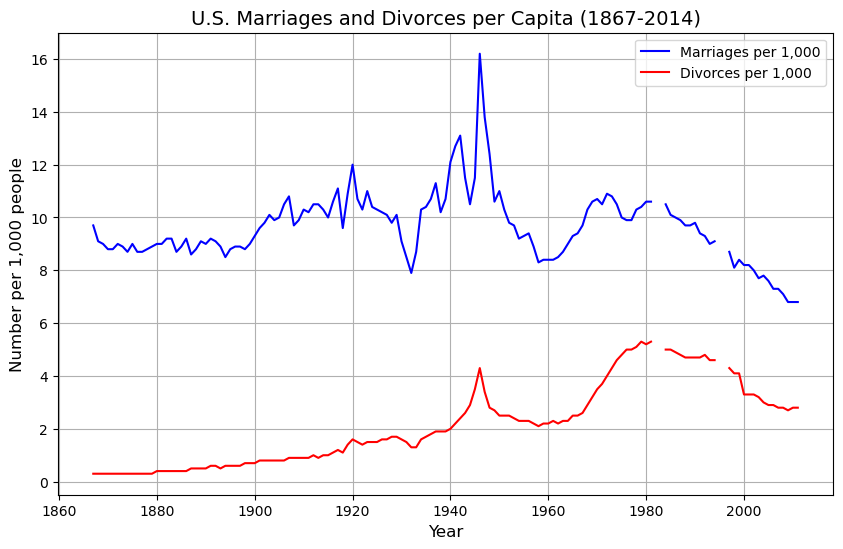

In [140]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\Vishnu Mohan\Desktop\Problem set 3\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)


plt.figure(figsize=(10, 6))  


plt.plot(data["Year"], data["Marriages_per_1000"], label="Marriages per 1,000", color="blue")
plt.plot(data["Year"], data["Divorces_per_1000"], label="Divorces per 1,000", color="red")


plt.xlabel("Year", fontsize=12)
plt.ylabel("Number per 1,000 people", fontsize=12)
plt.title("U.S. Marriages and Divorces per Capita (1867-2014)", fontsize=14)
plt.legend(loc="upper right")  


plt.grid(True)  
plt.show()


Question 7

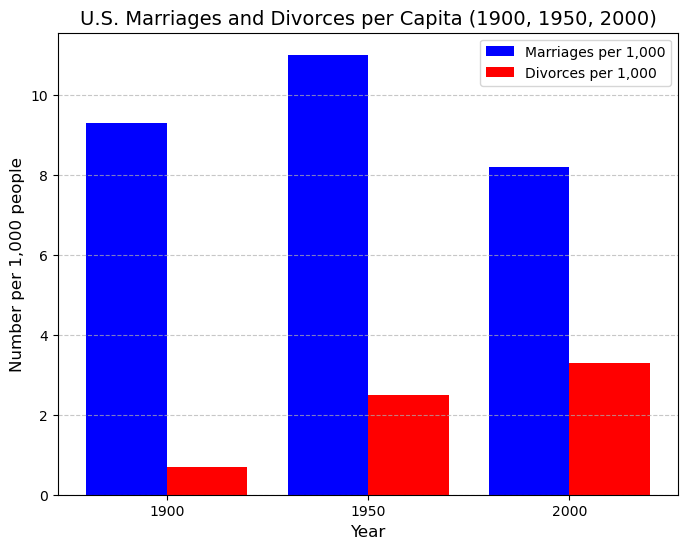

In [143]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\Vishnu Mohan\Desktop\Problem set 3\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)


filtered_data = data[data["Year"].isin([1900, 1950, 2000])]


x = filtered_data["Year"] 
marriages = filtered_data["Marriages_per_1000"]
divorces = filtered_data["Divorces_per_1000"]


bar_width = 0.4
x_positions = range(len(x))

plt.figure(figsize=(8, 6))


plt.bar([pos - bar_width / 2 for pos in x_positions], marriages, width=bar_width, label="Marriages per 1,000", color="blue")
plt.bar([pos + bar_width / 2 for pos in x_positions], divorces, width=bar_width, label="Divorces per 1,000", color="red")


plt.xlabel("Year", fontsize=12)
plt.ylabel("Number per 1,000 people", fontsize=12)
plt.title("U.S. Marriages and Divorces per Capita (1900, 1950, 2000)", fontsize=14)
plt.xticks(ticks=x_positions, labels=filtered_data["Year"])
plt.legend()


plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Question 8

Index(['Actor', 'Kill Count'], dtype='object')


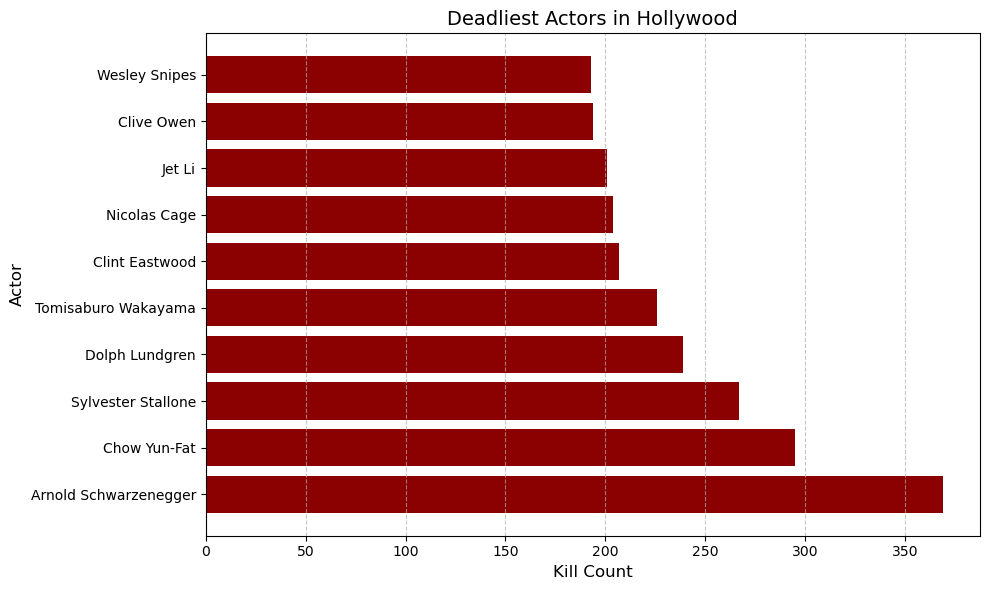

In [156]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\Vishnu Mohan\Desktop\Problem set 3\actor_kill_counts.csv"
data = pd.read_csv(file_path)


print(data.columns)


data.columns = data.columns.str.strip()


sorted_data = data.sort_values(by="Kill Count", ascending=False) 


plt.figure(figsize=(10, 6))  
plt.barh(sorted_data["Actor"], sorted_data["Kill Count"], color="darkred") 


plt.xlabel("Kill Count", fontsize=12)
plt.ylabel("Actor", fontsize=12)
plt.title("Deadliest Actors in Hollywood", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)


plt.tight_layout()  
plt.show()


Question 9

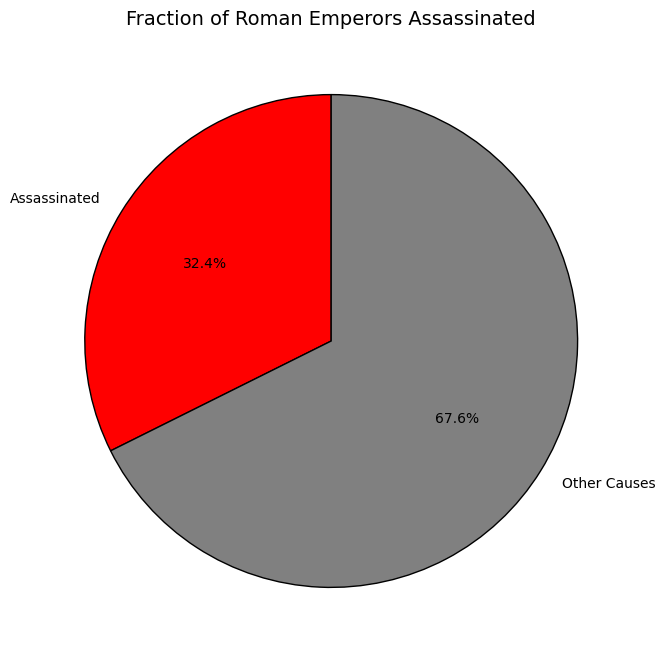

In [161]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\Vishnu Mohan\Desktop\Problem set 3\roman-emperor-reigns.csv"
data = pd.read_csv(file_path)


death_counts = data["Cause_of_Death"].value_counts()


assassinated_count = death_counts.get("Assassinated", 0)  
other_count = death_counts.sum() - assassinated_count  


labels = ["Assassinated", "Other Causes"]
sizes = [assassinated_count, other_count]
colors = ["red", "gray"]  

plt.figure(figsize=(8, 8)) 
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%", 
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "black"}, 
)
plt.title("Fraction of Roman Emperors Assassinated", fontsize=14)
plt.show()

Question 10

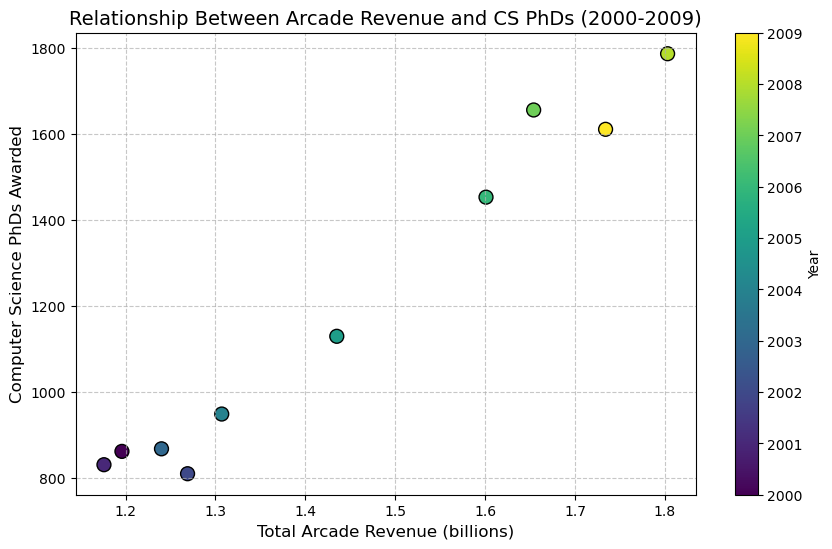

In [164]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\Vishnu Mohan\Desktop\Problem set 3\arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)


plt.figure(figsize=(10, 6))


scatter = plt.scatter(
    data["Total Arcade Revenue (billions)"], 
    data["Computer Science Doctorates Awarded (US)"], 
    c=data["Year"], 
    cmap="viridis", 
    edgecolor="black",  
    s=100  
)


plt.xlabel("Total Arcade Revenue (billions)", fontsize=12)
plt.ylabel("Computer Science PhDs Awarded", fontsize=12)
plt.title("Relationship Between Arcade Revenue and CS PhDs (2000-2009)", fontsize=14)
plt.colorbar(scatter, label="Year")  


plt.grid(True, linestyle="--", alpha=0.7)  
plt.show()